<!--
 * @Description: 
 * @Version: 1.0
 * @Autor: Yaxiong Shao
 * @Date: 2021-11-16 20:57:22
 * @LastEditors: Yaxiong Shao
 * @LastEditTime: 2021-11-16 22:26:33
-->

In [1]:
import pandas as pd
import numpy as np
import glob
import geopandas as gpd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
geo_pkg= 'accessibility_results.gpkg'

# 1. Process E2SFCA data

In [6]:
e2sfca_df= pd.read_csv('access_results_E2SFCA_merged_1000.csv')
drop_list = ['acc15_1000','acc30_1000','acc45_1000']
e2sfca_df.drop(drop_list, axis=1, inplace=True)
e2sfca_df.head()

,geoid,acc45,acc30,acc15
0,170314805002041,0.003280,0.002552,0.001760
1,170314801002041,0.003766,0.003254,0.002685
2,170314503001000,0.004093,0.003736,0.003550
3,170314503001026,0.003901,0.003490,0.003533
4,170318343006001,0.003869,0.003443,0.003768


In [7]:
col_list = ['acc15','acc30','acc45']
for col in col_list:
    Max = np.max(e2sfca_df[col])
    Min = np.min(e2sfca_df[col])
    e2sfca_df[col+'_n'] = (e2sfca_df[col] - Min)/(Max - Min)
e2sfca_df.head()

,geoid,acc45,acc30,acc15,acc15_n,acc30_n,acc45_n
0,170314805002041,0.003280,0.002552,0.001760,0.117723,0.330871,0.515282
1,170314801002041,0.003766,0.003254,0.002685,0.179619,0.421828,0.591689
2,170314503001000,0.004093,0.003736,0.003550,0.237483,0.484371,0.643059
3,170314503001026,0.003901,0.003490,0.003533,0.236347,0.452385,0.612949
4,170318343006001,0.003869,0.003443,0.003768,0.252029,0.446347,0.607876


In [8]:
col_list = ['acc15','acc30','acc45']
for col in col_list:
    e2sfca_df[col] = e2sfca_df[col]*1000 #per 1000 population accessibility
e2sfca_df.head()

,geoid,acc45,acc30,acc15,acc15_n,acc30_n,acc45_n
0,170314805002041,3.280142,2.552313,1.760012,0.117723,0.330871,0.515282
1,170314801002041,3.766209,3.253954,2.685384,0.179619,0.421828,0.591689
2,170314503001000,4.092998,3.736401,3.550465,0.237483,0.484371,0.643059
3,170314503001026,3.901456,3.489665,3.533484,0.236347,0.452385,0.612949
4,170318343006001,3.869182,3.443091,3.767941,0.252029,0.446347,0.607876


In [9]:
cook_df=gpd.read_file('Blocks.shp')
cook_df["geoid"] = cook_df["GEOID10"].astype("int64")
drop_list = ['GEOID10','TRACTCE10','HOUSING10','POP10','LAT','LON']
cook_df.drop(drop_list, axis=1, inplace=True)
cook_df.head()

,geometry,geoid
0,"POLYGON ((-88.04667 42.03609, -88.04655 42.036...",170318046091014
1,"POLYGON ((-87.70602 41.66378, -87.70557 41.663...",170318234004046
2,"POLYGON ((-87.74494 41.69999, -87.74494 41.699...",170318226022022
3,"POLYGON ((-87.73946 41.66173, -87.73964 41.661...",170318232002032
4,"POLYGON ((-87.71278 41.65982, -87.71278 41.659...",170318233023013


In [12]:
e2sfca_gdf = cook_df.merge(e2sfca_df, on="geoid", how='left')
e2sfca_gdf.columns= ['geometry','geoid','e2sg45_doc','e2sg30_doc','e2sg15_doc','e2sg15_doc_n','e2sg30_doc_n','e2sg45_doc_n']
e2sfca_gdf.head()

,geometry,geoid,e2sg45_doc,e2sg30_doc,e2sg15_doc,e2sg15_doc_n,e2sg30_doc_n,e2sg45_doc_n
0,"POLYGON ((-88.04667 42.03609, -88.04655 42.036...",170318046091014,3.520652,3.512358,4.912383,0.328578,0.455327,0.553089
1,"POLYGON ((-87.70602 41.66378, -87.70557 41.663...",170318234004046,2.941414,2.538386,1.847174,0.123553,0.329065,0.462036
2,"POLYGON ((-87.74494 41.69999, -87.74494 41.699...",170318226022022,3.134095,2.734652,3.741657,0.250271,0.354508,0.492324
3,"POLYGON ((-87.73946 41.66173, -87.73964 41.661...",170318232002032,3.099991,2.990778,3.643651,0.243716,0.387711,0.486964
4,"POLYGON ((-87.71278 41.65982, -87.71278 41.659...",170318233023013,3.101818,2.800403,2.476554,0.165651,0.363032,0.487251


In [14]:

layer_list= ['e2sg45_doc','e2sg30_doc','e2sg15_doc','e2sg15_doc_n','e2sg30_doc_n','e2sg45_doc_n']
for layer in layer_list:
    temp_gdf = e2sfca_gdf[['geoid',layer,'geometry']]
    temp_gdf.to_file(geo_pkg, layer=layer.replace('_doc',''), driver="GPKG")

# 2.Process SDA2SFCA data 

In [15]:
sda_df = pd.read_csv('access_results_merged_1000.csv')
sda_df.head()

,geoid,acc45,acc45_n,acc30,acc30_n,acc15,acc15_n
0,170310101001000,31.050060,0.666530,30.854113,0.528547,24.926353,0.216790
1,170310101001001,30.485575,0.654402,29.920615,0.512554,23.650493,0.205693
2,170310101001002,29.407589,0.631243,28.185786,0.482832,20.153508,0.175278
3,170310101001003,29.760154,0.638817,28.745554,0.492423,21.233095,0.184667
4,170310101002000,29.311739,0.629183,28.015322,0.479912,20.191326,0.175607


In [16]:
cook_df.shape, sda_df.shape

((99032, 2), (166980, 7))

In [17]:
sda_gdf= cook_df.merge(sda_df, on="geoid", how='left')
sda_gdf.head()

,geometry,geoid,acc45,acc45_n,acc30,acc30_n,acc15,acc15_n
0,"POLYGON ((-88.04667 42.03609, -88.04655 42.036...",170318046091014,27.895707,0.598761,27.702349,0.474550,39.151647,0.340514
1,"POLYGON ((-87.70602 41.66378, -87.70557 41.663...",170318234004046,21.090009,0.452547,17.373167,0.297586,11.506403,0.100069
2,"POLYGON ((-87.74494 41.69999, -87.74494 41.699...",170318226022022,22.696833,0.487068,19.092885,0.327049,22.952759,0.199624
3,"POLYGON ((-87.73946 41.66173, -87.73964 41.661...",170318232002032,22.494275,0.482716,20.735435,0.355190,21.259248,0.184895
4,"POLYGON ((-87.71278 41.65982, -87.71278 41.659...",170318233023013,22.311854,0.478797,19.232006,0.329432,15.250640,0.132635


In [18]:
layer_list= ['acc15','acc15_n','acc30','acc30_n','acc45','acc45_n']
layer_name_list= ['sda15','sda15_n','sda30','sda30_n','sda45','sda45_n']
for layer in layer_list:
    temp_gdf = sda_gdf[['geoid',layer,'geometry']]
    temp_gdf.to_file(geo_pkg, layer=layer, driver="GPKG")

# 3. Analysis based on study area without buffer

## 3.1 Describe info for E2SFCA data

In [19]:
e2sfca_gdf.head()

,geometry,geoid,e2sg45_doc,e2sg30_doc,e2sg15_doc,e2sg15_doc_n,e2sg30_doc_n,e2sg45_doc_n
0,"POLYGON ((-88.04667 42.03609, -88.04655 42.036...",170318046091014,3.520652,3.512358,4.912383,0.328578,0.455327,0.553089
1,"POLYGON ((-87.70602 41.66378, -87.70557 41.663...",170318234004046,2.941414,2.538386,1.847174,0.123553,0.329065,0.462036
2,"POLYGON ((-87.74494 41.69999, -87.74494 41.699...",170318226022022,3.134095,2.734652,3.741657,0.250271,0.354508,0.492324
3,"POLYGON ((-87.73946 41.66173, -87.73964 41.661...",170318232002032,3.099991,2.990778,3.643651,0.243716,0.387711,0.486964
4,"POLYGON ((-87.71278 41.65982, -87.71278 41.659...",170318233023013,3.101818,2.800403,2.476554,0.165651,0.363032,0.487251


In [20]:
e2sfca_gdf.shape

(99032, 8)

In [21]:
describe_df2 = e2sfca_gdf.describe().transpose()
describe_df2.head(10)

,count,mean,std,min,25%,50%,75%,max
geoid,99032.0,1.703165e+14,2.619393e+09,1.703101e+14,1.703152e+14,1.703180e+14,1.703182e+14,1.703199e+14
e2sg45_doc,99032.0,4.095405e+00,1.091610e+00,1.110292e-01,3.315846e+00,4.170916e+00,4.949166e+00,6.363700e+00
e2sg30_doc,99032.0,3.947091e+00,1.328914e+00,2.736344e-04,2.933504e+00,3.852289e+00,4.787864e+00,7.713931e+00
e2sg15_doc,99032.0,3.869097e+00,2.499689e+00,0.000000e+00,2.086924e+00,3.284490e+00,5.039276e+00,1.495042e+01
e2sg15_doc_n,99032.0,2.587952e-01,1.671986e-01,0.000000e+00,1.395897e-01,2.196922e-01,3.370659e-01,1.000000e+00
e2sg30_doc_n,99032.0,5.116834e-01,1.722745e-01,3.547275e-05,3.802865e-01,4.993937e-01,6.206775e-01,1.000000e+00
e2sg45_doc_n,99032.0,6.434368e-01,1.715949e-01,1.711560e-02,5.208946e-01,6.553068e-01,7.776433e-01,1.000000e+00


In [22]:
#select rows,columns that we need
describe_df2 = describe_df2.loc[["e2sg15_doc","e2sg30_doc","e2sg45_doc"]] #select rows
describe_df2 = describe_df2[["count","mean","std","min","max"]]#select columns
describe_df2['method'] = 'E2SFCA'
describe_df2.head()

,count,mean,std,min,max,method
e2sg15_doc,99032.0,3.869097,2.499689,0.000000,14.950419,E2SFCA
e2sg30_doc,99032.0,3.947091,1.328914,0.000274,7.713931,E2SFCA
e2sg45_doc,99032.0,4.095405,1.091610,0.111029,6.363700,E2SFCA


## 3.2 Describe info for SDA-2SFCA data

In [23]:
sda_gdf.head()

,geometry,geoid,acc45,acc45_n,acc30,acc30_n,acc15,acc15_n
0,"POLYGON ((-88.04667 42.03609, -88.04655 42.036...",170318046091014,27.895707,0.598761,27.702349,0.474550,39.151647,0.340514
1,"POLYGON ((-87.70602 41.66378, -87.70557 41.663...",170318234004046,21.090009,0.452547,17.373167,0.297586,11.506403,0.100069
2,"POLYGON ((-87.74494 41.69999, -87.74494 41.699...",170318226022022,22.696833,0.487068,19.092885,0.327049,22.952759,0.199624
3,"POLYGON ((-87.73946 41.66173, -87.73964 41.661...",170318232002032,22.494275,0.482716,20.735435,0.355190,21.259248,0.184895
4,"POLYGON ((-87.71278 41.65982, -87.71278 41.659...",170318233023013,22.311854,0.478797,19.232006,0.329432,15.250640,0.132635


In [24]:
sda_gdf.shape

(99032, 8)

In [25]:
describe_df = sda_gdf.describe().transpose()
describe_df.head(10)

,count,mean,std,min,25%,50%,75%,max
geoid,99032.0,1.703165e+14,2.619393e+09,1.703101e+14,1.703152e+14,1.703180e+14,1.703182e+14,1.703199e+14
acc45,99032.0,3.023255e+01,8.096777e+00,8.280490e-01,2.429965e+01,3.076478e+01,3.667841e+01,4.657178e+01
acc45_n,99032.0,6.489660e-01,1.739521e-01,1.723621e-02,5.215030e-01,6.604007e-01,7.874497e-01,1.000000e+00
acc30,99032.0,2.919914e+01,1.043216e+01,3.399505e-03,2.124755e+01,2.792118e+01,3.586755e+01,5.837228e+01
acc30_n,99032.0,5.001936e-01,1.787281e-01,0.000000e+00,3.639637e-01,4.782990e-01,6.144395e-01,1.000000e+00
acc15,99032.0,2.825472e+01,1.848025e+01,0.000000e+00,1.620071e+01,2.436080e+01,3.435324e+01,1.149762e+02
acc15_n,99032.0,2.457381e-01,1.607322e-01,0.000000e+00,1.408981e-01,2.118707e-01,2.987801e-01,1.000000e+00


In [26]:
#select rows,columns that we need
describe_df = describe_df.loc[["acc15","acc30","acc45"]]
describe_df = describe_df[["count","mean","std","min","max"]]
describe_df['method'] = 'SDA-2SFCA'
describe_df.head()

,count,mean,std,min,max,method
acc15,99032.0,28.254723,18.480245,0.000000,114.976238,SDA-2SFCA
acc30,99032.0,29.199142,10.432163,0.003400,58.372284,SDA-2SFCA
acc45,99032.0,30.232547,8.096777,0.828049,46.571777,SDA-2SFCA


In [27]:
#select rows,columns that we need
describe_df = describe_df.loc[["acc15","acc30","acc45"]]
describe_df = describe_df[["count","mean","std","min","max"]]
describe_df['method'] = 'SDA-2SFCA'
describe_df.head()

,count,mean,std,min,max,method
acc15,99032.0,28.254723,18.480245,0.000000,114.976238,SDA-2SFCA
acc30,99032.0,29.199142,10.432163,0.003400,58.372284,SDA-2SFCA
acc45,99032.0,30.232547,8.096777,0.828049,46.571777,SDA-2SFCA


## 3.3 Merge two dfs

In [28]:
des_df = pd.concat([describe_df,describe_df2], axis=0)
des_df['catchment'] = ['15 minutes','30 minutes','45 minutes','15 minutes','30 minutes','45 minutes']
des_df= des_df[['catchment','method','count','mean','std','max','min']]
des_df = des_df.sort_values(by=['catchment'], ascending=True)
des_df.head(6)

,catchment,method,count,mean,std,max,min
acc15,15 minutes,SDA-2SFCA,99032.0,28.254723,18.480245,114.976238,0.000000
e2sg15_doc,15 minutes,E2SFCA,99032.0,3.869097,2.499689,14.950419,0.000000
acc30,30 minutes,SDA-2SFCA,99032.0,29.199142,10.432163,58.372284,0.003400
e2sg30_doc,30 minutes,E2SFCA,99032.0,3.947091,1.328914,7.713931,0.000274
acc45,45 minutes,SDA-2SFCA,99032.0,30.232547,8.096777,46.571777,0.828049
e2sg45_doc,45 minutes,E2SFCA,99032.0,4.095405,1.091610,6.363700,0.111029


In [29]:
des_df.to_excel('results_statistics.xlsx',index=False)

# 4. Scatterplot

In [45]:
merged_df= sda_gdf.merge(e2sfca_gdf, on="geoid")
merged_df.head()

,geometry_x,geoid,acc45,acc45_n,acc30,acc30_n,acc15,acc15_n,geometry_y,e2sg45_doc,e2sg30_doc,e2sg15_doc,e2sg15_doc_n,e2sg30_doc_n,e2sg45_doc_n
0,"POLYGON ((-88.04667 42.03609, -88.04655 42.036...",170318046091014,27.895707,0.598761,27.702349,0.474550,39.151647,0.340514,"POLYGON ((-88.04667 42.03609, -88.04655 42.036...",3.520652,3.512358,4.912383,0.328578,0.455327,0.553089
1,"POLYGON ((-87.70602 41.66378, -87.70557 41.663...",170318234004046,21.090009,0.452547,17.373167,0.297586,11.506403,0.100069,"POLYGON ((-87.70602 41.66378, -87.70557 41.663...",2.941414,2.538386,1.847174,0.123553,0.329065,0.462036
2,"POLYGON ((-87.74494 41.69999, -87.74494 41.699...",170318226022022,22.696833,0.487068,19.092885,0.327049,22.952759,0.199624,"POLYGON ((-87.74494 41.69999, -87.74494 41.699...",3.134095,2.734652,3.741657,0.250271,0.354508,0.492324
3,"POLYGON ((-87.73946 41.66173, -87.73964 41.661...",170318232002032,22.494275,0.482716,20.735435,0.355190,21.259248,0.184895,"POLYGON ((-87.73946 41.66173, -87.73964 41.661...",3.099991,2.990778,3.643651,0.243716,0.387711,0.486964
4,"POLYGON ((-87.71278 41.65982, -87.71278 41.659...",170318233023013,22.311854,0.478797,19.232006,0.329432,15.250640,0.132635,"POLYGON ((-87.71278 41.65982, -87.71278 41.659...",3.101818,2.800403,2.476554,0.165651,0.363032,0.487251


In [46]:
merged_df.shape

(99032, 15)

In [32]:
merged_df.to_csv('e2sfca_and_sda2sfca_all_data.csv',index = False)

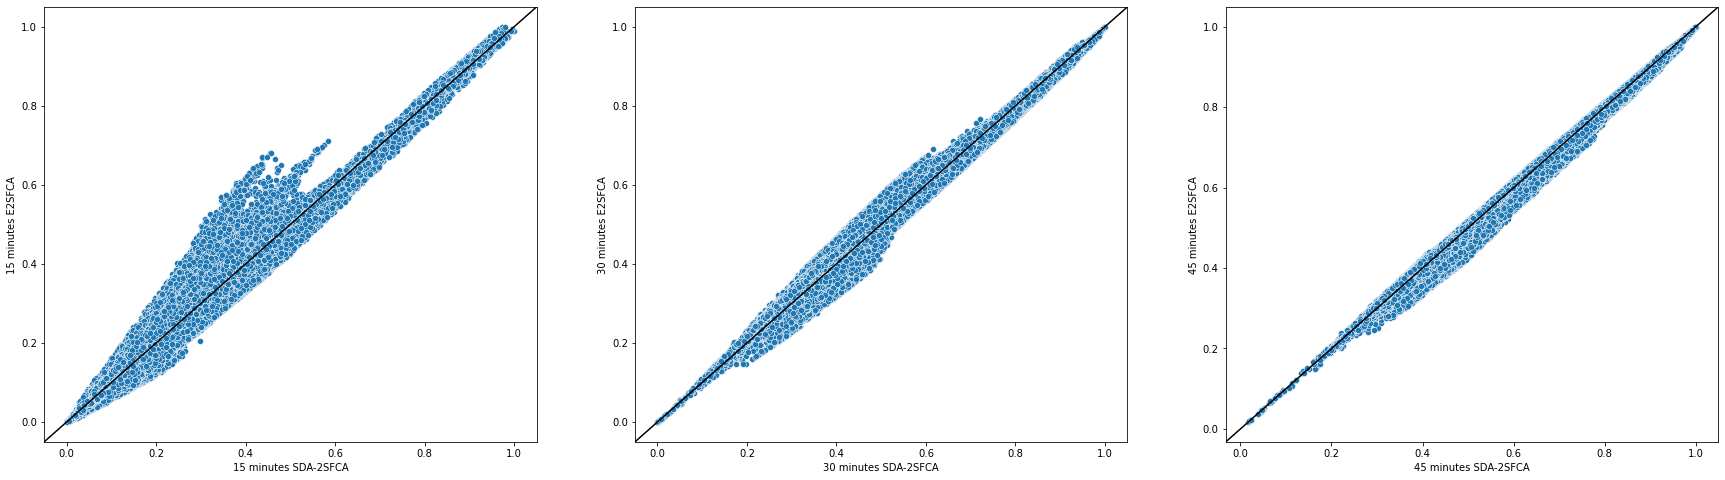

In [47]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))

sns.scatterplot(x=merged_df["acc15_n"], y=merged_df['e2sg15_doc_n'], ax=ax1)
sns.scatterplot(x=merged_df["acc30_n"], y=merged_df['e2sg30_doc_n'], ax=ax2)
sns.scatterplot(x=merged_df["acc45_n"], y=merged_df['e2sg45_doc_n'], ax=ax3)


ax1.plot([0,1],[0,1], transform=ax1.transAxes, color='k')
ax2.plot([0,1],[0,1], transform=ax2.transAxes, color='k')
ax3.plot([0,1],[0,1], transform=ax3.transAxes, color='k')
# ax1.set_xlim(0,0.018)
# ax1.set_ylim(0,0.018)
# ax2.set_xlim(0,0.008)
# ax2.set_ylim(0,0.008)
# ax3.set_xlim(0,0.0065)
# ax3.set_ylim(0,0.0065)
# ax4.set_xlim(0,0.0065)
# ax4.set_ylim(0,0.0065)
ax1.set_xlabel('15 minutes SDA-2SFCA')
ax1.set_ylabel('15 minutes E2SFCA')
ax2.set_xlabel('30 minutes SDA-2SFCA')
ax2.set_ylabel('30 minutes E2SFCA')
ax3.set_xlabel('45 minutes SDA-2SFCA')
ax3.set_ylabel('45 minutes E2SFCA')
fig.savefig("ESFCA VS SDA2SFCA",dpi=300)

In [48]:
# Count number of points over y=x line
count_df = merged_df[['geoid','acc15_n','acc30_n','acc45_n','e2sg15_doc_n','e2sg30_doc_n','e2sg45_doc_n']]
count_df.head()

,geoid,acc15_n,acc30_n,acc45_n,e2sg15_doc_n,e2sg30_doc_n,e2sg45_doc_n
0,170318046091014,0.340514,0.474550,0.598761,0.328578,0.455327,0.553089
1,170318234004046,0.100069,0.297586,0.452547,0.123553,0.329065,0.462036
2,170318226022022,0.199624,0.327049,0.487068,0.250271,0.354508,0.492324
3,170318232002032,0.184895,0.355190,0.482716,0.243716,0.387711,0.486964
4,170318233023013,0.132635,0.329432,0.478797,0.165651,0.363032,0.487251


In [53]:
count15_df = count_df[count_df['e2sg15_doc_n']> count_df['acc15_n']]
count30_df = count_df[count_df['e2sg30_doc_n']> count_df['acc30_n']]
count45_df = count_df[count_df['e2sg45_doc_n']> count_df['acc45_n']]
count15_df.shape,count30_df.shape,count45_df.shape

((56708, 10), (70837, 10), (41863, 10))

In [50]:
count_df['diff15'] =  count_df['acc15_n']-count_df['e2sg15_doc_n']
count_df['diff30'] =  count_df['acc30_n']-count_df['e2sg30_doc_n']
count_df['diff45'] =  count_df['acc45_n']-count_df['e2sg45_doc_n']
count_df.head()

/var/folders/1v/3tkcnrqs25b76nwc2w2lsxmw0000gn/T/ipykernel_41672/3518107533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_df['diff15'] =  count_df['acc15_n']-count_df['e2sg15_doc_n']
/var/folders/1v/3tkcnrqs25b76nwc2w2lsxmw0000gn/T/ipykernel_41672/3518107533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_df['diff30'] =  count_df['acc30_n']-count_df['e2sg30_doc_n']
/var/folders/1v/3tkcnrqs25b76nwc2w2lsxmw0000gn/T/ipykernel_41672/3518107533.py:3: SettingWithCopyWarning: 
A value is tryi

,geoid,acc15_n,acc30_n,acc45_n,e2sg15_doc_n,e2sg30_doc_n,e2sg45_doc_n,diff15,diff30,diff45
0,170318046091014,0.340514,0.474550,0.598761,0.328578,0.455327,0.553089,0.011936,0.019223,0.045672
1,170318234004046,0.100069,0.297586,0.452547,0.123553,0.329065,0.462036,-0.023484,-0.031479,-0.009489
2,170318226022022,0.199624,0.327049,0.487068,0.250271,0.354508,0.492324,-0.050647,-0.027459,-0.005257
3,170318232002032,0.184895,0.355190,0.482716,0.243716,0.387711,0.486964,-0.058821,-0.032521,-0.004247
4,170318233023013,0.132635,0.329432,0.478797,0.165651,0.363032,0.487251,-0.033016,-0.033599,-0.008454


In [51]:
count_df[count_df['diff15']>0].shape,count_df[count_df['diff30']>0].shape,count_df[count_df['diff45']>0].shape


((42277, 10), (28194, 10), (57168, 10))

# 4. Process data for insurance  707 and 601

In [38]:
sda707_df= pd.read_csv('access30_707.csv')
sda707_df.columns=['geoid','acc30']

Max = np.max(sda707_df['acc30'])
Min = np.min(sda707_df['acc30'])
sda707_df['acc30_n'] = (sda707_df['acc30'] - Min)/(Max - Min)

sda707_df['acc30'] = sda707_df['acc30']*1000
sda707_df.head()

,geoid,acc30,acc30_n
0,170318355001034,1.720173,0.708277
1,170312605001002,1.777230,0.731770
2,170312705001006,2.096469,0.863219
3,170312714001013,2.096479,0.863223
4,170312518002008,1.609407,0.662669


In [39]:
sda601_df= pd.read_csv('access30_601.csv')
sda601_df.columns=['geoid','acc30']

Max = np.max(sda601_df['acc30'])
Min = np.min(sda601_df['acc30'])
sda601_df['acc30_n'] = (sda601_df['acc30'] - Min)/(Max - Min)


sda601_df['acc30'] = sda601_df['acc30']*1000
sda601_df.head()

,geoid,acc30,acc30_n
0,170318355001034,0.075037,0.766817
1,170312605001002,0.060567,0.618937
2,170312705001006,0.075748,0.774086
3,170312714001013,0.075600,0.772570
4,170312518002008,0.052710,0.538640


In [40]:
sda707_gdf=cook_df.merge(sda707_df, on="geoid", how='left')
sda707_gdf.fillna(0, inplace=True)
sda601_gdf=cook_df.merge(sda601_df, on="geoid", how='left')
sda601_gdf.fillna(0, inplace=True)
sda601_gdf.head()

,geometry,geoid,acc30,acc30_n
0,"POLYGON ((-88.04667 42.03609, -88.04655 42.036...",170318046091014,0.001711,0.017463
1,"POLYGON ((-87.70602 41.66378, -87.70557 41.663...",170318234004046,0.007560,0.077237
2,"POLYGON ((-87.74494 41.69999, -87.74494 41.699...",170318226022022,0.009714,0.099254
3,"POLYGON ((-87.73946 41.66173, -87.73964 41.661...",170318232002032,0.006828,0.069760
4,"POLYGON ((-87.71278 41.65982, -87.71278 41.659...",170318233023013,0.008097,0.082721


In [41]:
sda601_gdf.shape,sda707_gdf.shape

((99032, 4), (99032, 4))

In [42]:
sda707_gdf.to_file(geo_pkg, layer="acc30_707", driver="GPKG")
sda601_gdf.to_file(geo_pkg, layer="acc30_601", driver="GPKG")

In [43]:
sda601_gdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
geoid,99032.0,1.703165e+14,2.619393e+09,1.703101e+14,1.703152e+14,1.703180e+14,1.703182e+14,1.703199e+14
acc30,99032.0,3.079678e-02,2.523415e-02,0.000000e+00,7.424444e-03,2.647772e-02,4.729856e-02,9.785478e-02
acc30_n,99032.0,3.147041e-01,2.578790e-01,0.000000e+00,7.585150e-02,2.705655e-01,4.833431e-01,1.000000e+00


In [44]:
sda707_gdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
geoid,99032.0,1.703165e+14,2.619393e+09,1.703101e+14,1.703152e+14,1.703180e+14,1.703182e+14,1.703199e+14
acc30,99032.0,1.058604e+00,4.794064e-01,3.515617e-05,6.819555e-01,9.494729e-01,1.365744e+00,2.428659e+00
acc30_n,99032.0,4.358720e-01,1.973984e-01,0.000000e+00,2.807847e-01,3.909366e-01,5.623387e-01,1.000000e+00
